In [20]:
"""
<Python 문서 전체 설명>
1. 전체 순서
    
2. #: 코드 설명, ##: 대제목, ###: 소제목
    ##과 ###은 마크다운 셀에서 실행, 일반 셀과 구분하기 위해 ***으로 감싸줌
3. 수정하기 쉽도록 문단 간의 띄어쓰기는 최종 파이썬 파일을 정리할 때 할 예정
    파이썬 파일은 코드를 전체적으로 볼 때만 사용
"""

'\n<Python 문서 전체 설명>\n1. 전체 순서\n    \n2. #: 코드 설명, ##: 대제목, ###: 소제목\n    ##과 ###은 마크다운 셀에서 실행, 일반 셀과 구분하기 위해 ***으로 감싸줌\n3. 수정하기 쉽도록 문단 간의 띄어쓰기는 최종 파이썬 파일을 정리할 때 할 예정\n    파이썬 파일은 코드를 전체적으로 볼 때만 사용\n'

## ***8. 결과 비교***

## ***9. 결과 해석***

## ***10. 모델 저장 및 로딩***

## ***1. 데이터셋 준비하기***

In [21]:
# warning 제거
import warnings
warnings.filterwarnings('ignore')
# 필요 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [22]:
# 데이터 파일 확인
input_path = os.getcwd() + '/used_car copy'  # 데이터셋이 저장된 경로
file_paths = []

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)

print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")
print(file_paths)

총 9개의 CSV 파일을 발견했습니다.
['c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\audi.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\bmw.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\ford.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\hyundai.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\merc.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\skoda.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\toyota.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vauxhall.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vw.csv']


In [23]:
# CSV 파일 읽기 및 병합
data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0].split('\\')[1]
    data_frames.append(df)    

c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\audi.csv 파일 읽기 완료. 데이터 크기: (10668, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\bmw.csv 파일 읽기 완료. 데이터 크기: (10781, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\ford.csv 파일 읽기 완료. 데이터 크기: (17965, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\hyundai.csv 파일 읽기 완료. 데이터 크기: (4860, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\merc.csv 파일 읽기 완료. 데이터 크기: (13119, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\skoda.csv 파일 읽기 완료. 데이터 크기: (6267, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\toyota.csv 파일 읽기 완료. 데이터 크기: (6738, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vauxhall.csv 파일 읽기 완료. 데이터 크기: (13632, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vw.csv 파일 읽기 완료. 데이터 크기: (15157, 9)


In [24]:
# 모든 데이터프레임을 하나로 병합
if data_frames:
    full_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full_data.shape}")
else:
    print("CSV 파일이 없습니다.")    

병합된 데이터 크기: (99187, 11)


In [25]:
# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full_data.head())

데이터의 첫 5행 미리보기:
  model  year  price transmission  mileage fuelType    tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150.0  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20.0  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30.0  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145.0  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145.0  49.6         1.0   

  carMake  tax(£)  
0    audi     NaN  
1    audi     NaN  
2    audi     NaN  
3    audi     NaN  
4    audi     NaN  


In [26]:
# 데이터셋 원본파일(full_data) 내보내기
# full_data.to_csv('full_data.csv', index=False) # 파일 실행마다 파일 생성을 방지하기 위해 주석 처리

## ***2. 데이터셋 EDA***

### ***EDA를 위한 최소한의 전처리***

In [27]:
# 전처리를 위한 복사본 만들기
full2_data = full_data.copy(deep=True)

# 명목형 변수 값의 공백을 삭제
str_list = ['model', 'transmission', 'fuelType', 'carMake'] # 명목변수
for i in str_list:
    full2_data[i] = full2_data[i].str.strip()
print(full2_data['model'].unique()[:20])

['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5']


In [28]:
# tax열 결측치 채우기: tax 와 tax(£) 컬럼 합치기
full2_data['tax'].fillna(full2_data['tax(£)'], inplace=True)
full2_data.drop(columns='tax(£)', inplace=True)
full2_data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
carMake         0
dtype: int64

In [36]:
# 전체 데이터 확인
print('1. 데이터 프레임 요약:')
print(full2_data.info())
print(f'\n2. 결측값 확인: \n{full2_data.isna().sum()}')
print(f'\n3. 기술통계 요약: \n{full2_data.describe()}')

1. 데이터 프레임 요약:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   carMake       99187 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.6+ MB
None

2. 결측값 확인: 
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
carMake         0
dtype: int64

3. 기술통계 요약: 
               year          price        mileage           tax          

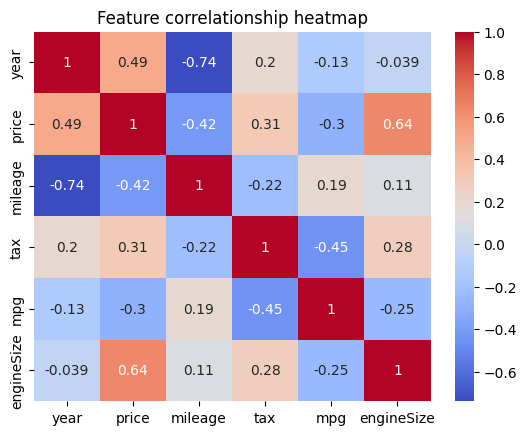

In [51]:
# 데이터 간 상관관계 히트맵 표현
sns.heatmap(data=full2_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature correlationship heatmap')
plt.show()

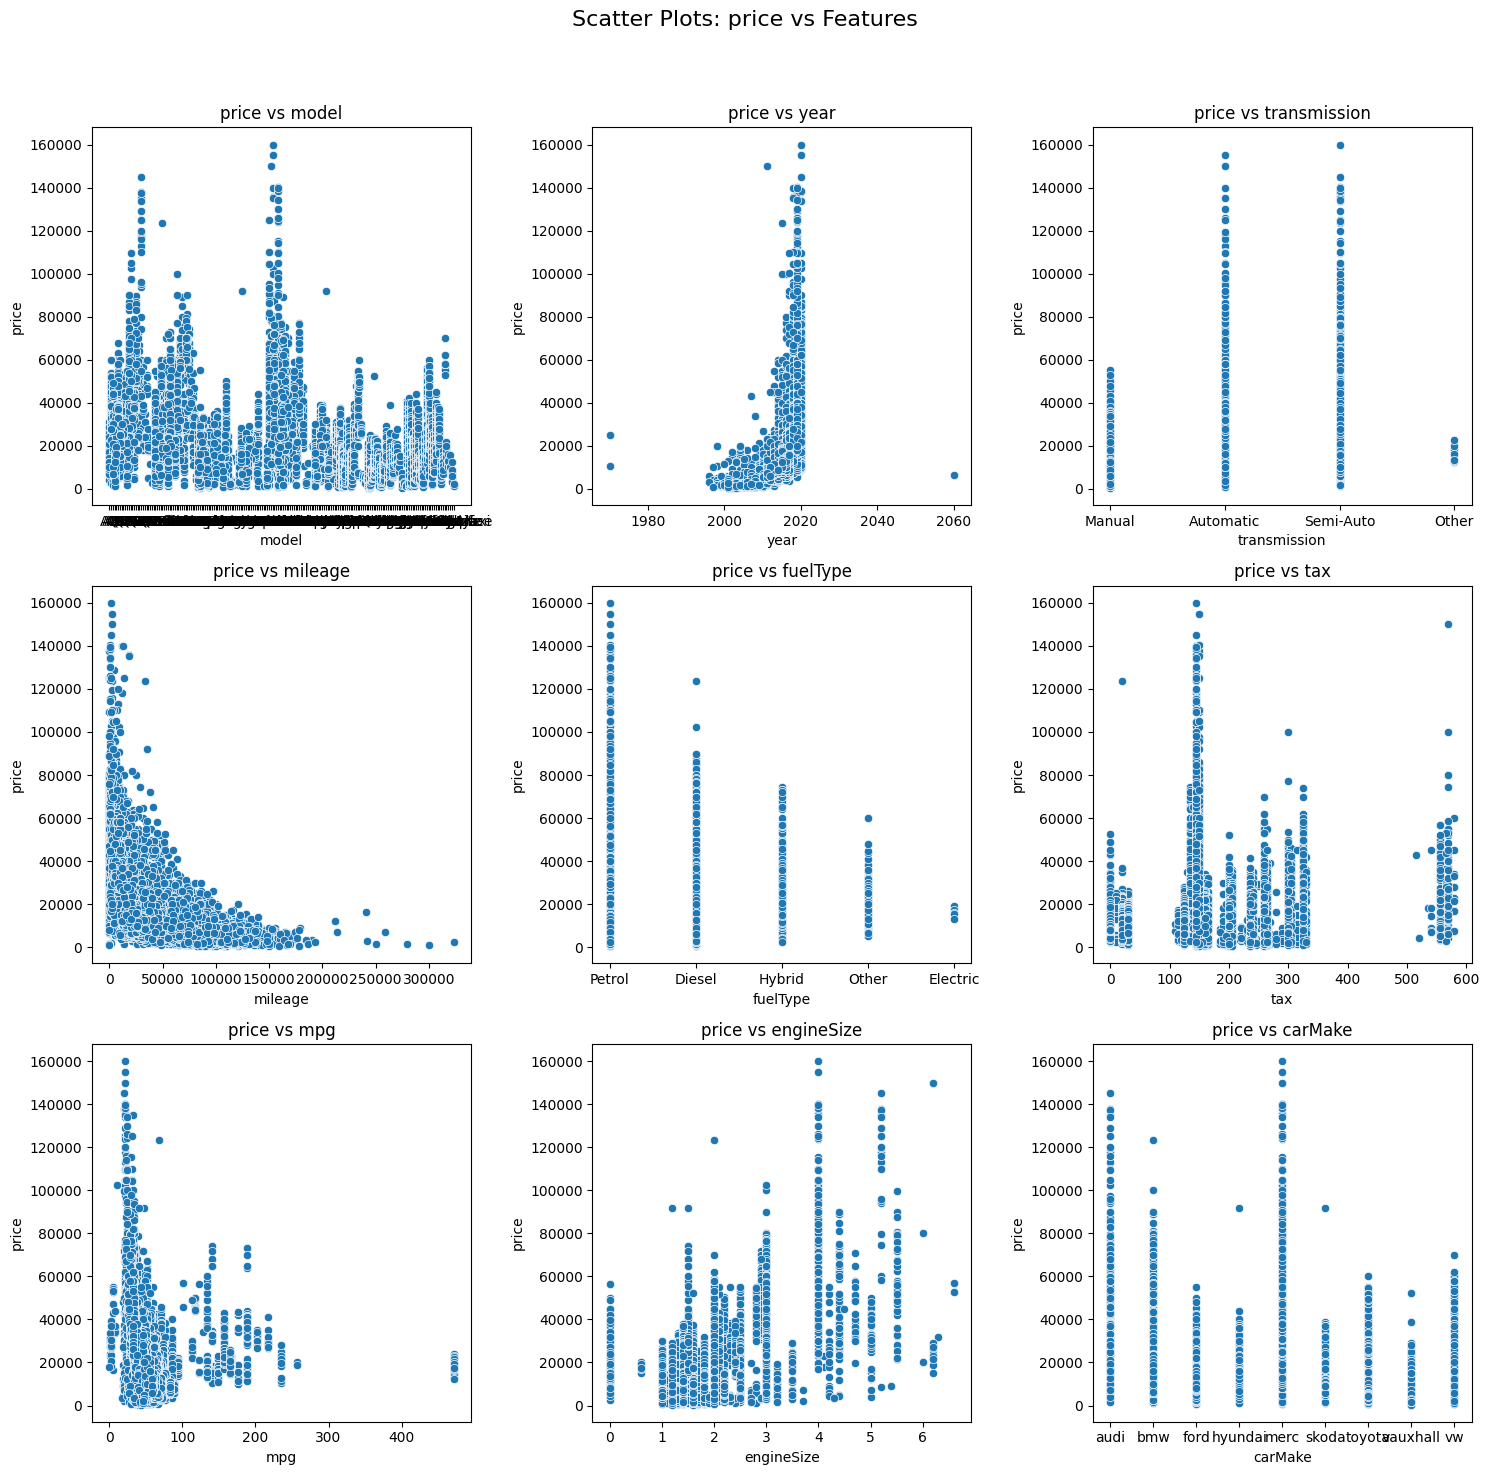

In [50]:
# scatterplot 그리기

# Subplot 설정
num_features = len(full2_data.columns) -1  # 독립 변수 개수
cols = 3  # 한 줄에 들어갈 플롯 수
rows = (num_features + cols - 1) // cols  # 행 개수 계산

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle("Scatter Plots: price vs Features", fontsize=16)

# 각 독립 변수와 price의 산점도 그리기
for i, column in enumerate(full2_data.columns.drop('price')):
    ax = axes[i // cols, i % cols]
    sns.scatterplot(data=full2_data, x=column, y="price", ax=ax)
    ax.set_title(f"price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("price")

# 빈 subplot 숨기기 (독립변수 개수가 subplot보다 적은 경우)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 간격 조정
plt.show()

## ***3. 데이터셋 분할하기***

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X = full2_data.drop(columns='price')
y = full2_data['price']

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(69430, 24) (29756, 24)
(69430,) (29756,)


## ***4. 데이터 전처리***

### ***이상치 제거***

In [ ]:
# 모델 별 이상치 확인: 너무 길어서 주석 처리
#unique_model = full2_data['model'].unique()
#count_nums=0
#for i in unique_model:
#    model_year = full2_data[full2_data['model'] == i]['year']
#    if any(x < 2000 for x in model_year):
#        count_nums += 1
#        year_before_2000 = [x for x in model_year if x < 2000]
#        print(f'model name:{i}, count:{len(model_year)}')
#        print(f'2000년 이전 year 수:{len(year_before_2000)}')
#        plt.boxplot(model_year)
#        plt.show()
#    elif any(x > 2020 for x in model_year):
#        count_nums += 1
#        year_after_2020 = [x for x in model_year if x > 2020]
#        print(f'model name:{i}, count:{len(model_year)}')
#        print(f'2000년 이후 year 수:{len(year_before_2000)}')
#        plt.boxplot(model_year)
#        plt.show()
#print(f'count_nums:{count_nums}')

In [ ]:
# year별 개수 세기
full2_data_cnt =full2_data.groupby(by='year').agg('count')
full2_data_cnt

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake
year,,,,,,,,,
1970,2,2,2,2,2,2,2,2,2
1996,2,2,2,2,2,2,2,2,2
1997,4,4,4,4,4,4,4,4,4
1998,8,8,8,8,8,8,8,8,8
1999,6,6,6,6,6,6,6,6,6
2000,9,9,9,9,9,9,9,9,9
2001,20,20,20,20,20,20,20,20,20
2002,31,31,31,31,31,31,31,31,31
2003,34,34,34,34,34,34,34,34,34


      model  cumsum  cumsum_ratio
year                             
1970      2       2      0.002016
1996      2       4      0.004033
1997      4       8      0.008066
1998      8      16      0.016131
1999      6      22      0.022180
2000      9      31      0.031254
2001     20      51      0.051418
2002     31      82      0.082672
2003     34     116      0.116951
2004     52     168      0.169377
2005     69     237      0.238943
2006     86     323      0.325648
2007    163     486      0.489984
2008    200     686      0.691623
2009    278     964      0.971902
2010    340    1304      1.314688
2011    432    1736      1.750229
2012    634    2370      2.389426
2013   2603    4973      5.013762
2014   4085    9058      9.132245
2015   7645   16703     16.839908
2016  15850   32553     32.819825
2017  21733   54286     54.730963
2018  13664   67950     68.506962
2019  26771   94721     95.497394
2020   4465   99186     99.998992
2060      1   99187    100.000000


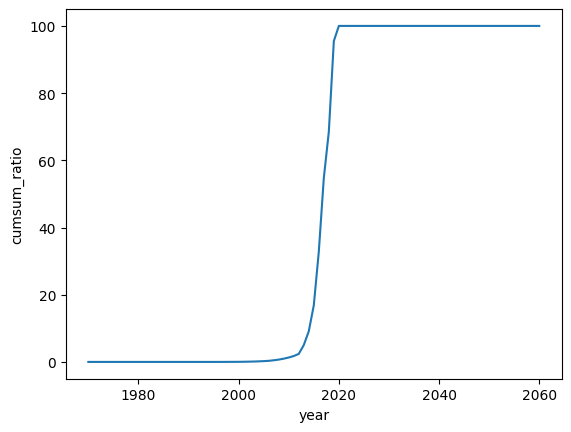

In [ ]:
# year의 누적합과, 누적비율을 세기: 2014년~2020년은 데이터의 95%로서 적당한 시기임
full2_data_cnt['cumsum'] =full2_data_cnt['model'].cumsum()
full2_data_cnt['cumsum_ratio'] = full2_data_cnt['cumsum'] / 99187 * 100
print(full2_data_cnt[['model', 'cumsum', 'cumsum_ratio']])
sns.lineplot(data=full2_data_cnt, x='year', y='cumsum_ratio')
plt.show()

In [ ]:
# IQR 기준으로 year 이상치 탐지
Q1 = full2_data["year"].quantile(0.25)
Q3 = full2_data["year"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = full2_data[(full2_data["year"] < lower_bound) | (full2_data["year"] > upper_bound)]
print(outliers)

      model  year  price transmission  mileage fuelType    tax   mpg  \
7403     S4  2004   6990    Automatic    88024   Petrol  325.0  22.4   
7404     A3  2009   2490       Manual   152034   Diesel  150.0  55.4   
7414     A3  2009   4495       Manual    92000   Petrol  200.0  40.9   
7415     A5  2010   9495       Manual    76000   Petrol  235.0  38.7   
7416     A3  2009   5995       Manual    82000   Petrol  235.0  39.2   
...     ...   ...    ...          ...      ...      ...    ...   ...   
99181   Eos  2006   2995       Manual    92640   Diesel  200.0  48.0   
99183   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
99184   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
99185   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
99186   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

       engineSize carMake  
7403          4.2    audi  
7404          1.9    audi  
7414          1.6    audi  
7415          2.0    au

In [ ]:
# year 이상치, 2060년 데이터 1개 삭제
print(full2_data.shape)
cond1 = (full2_data['year'] == 2060)
full2_data = full2_data[~cond1]
print(full2_data.shape)
full2_data.reset_index(drop=True, inplace=True) # 행과 함께 중간의 index 1개가 삭제됨. index를 초기화

(99187, 10)
(99186, 10)


In [85]:
full2_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
99181,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
99182,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
99183,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
99184,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw


### ***인코딩***

In [86]:
# 인코딩 전 컬럼 확인
print(full2_data.select_dtypes(exclude=[int, float]).columns) # 수치형 자료가 아닌 열 4개
full2_data.head(3)

Index(['model', 'transmission', 'fuelType', 'carMake'], dtype='object')


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi


In [87]:
# 명목형 변수 별 고유값 개수 확인: 값 많으면 라벨, 적으면 원 핫 인코딩(모델의 학습 속도 고려)
print(full2_data[['model', 'transmission', 'fuelType', 'carMake']].nunique())

model           195
transmission      4
fuelType          5
carMake           9
dtype: int64


In [88]:
# 명목형 변수의 고유값 별 개수 확인1
#vc = full2_data['model'].value_counts()

# 모델의 정확도 향상을 위해 고유값 1개인 데이터 삭제 고려: train / test 데이터 간의 차이가 발생함
#print(f'{vc[vc == 1]} \n\n개수가 1인 모델의 수: {len(vc[vc == 1])}') 
#m_vc_1 = vc[vc == 1].index
#cond = full2_data['model'].isin(m_vc_1)
#
#print(f'\n{full2_data.shape}')
#full2_data = full2_data[~cond]
#print(full2_data.shape)

In [89]:
# 명목형 변수의 고유값 별 개수 확인2
print(full2_data['transmission'].value_counts())
print(full2_data['fuelType'].value_counts())
print(full2_data['carMake'].value_counts())

transmission
Manual       56445
Semi-Auto    22677
Automatic    20055
Other            9
Name: count, dtype: int64
fuelType
Petrol      54927
Diesel      40928
Hybrid       3078
Other         247
Electric        6
Name: count, dtype: int64
carMake
ford        17964
vw          15157
vauxhall    13632
merc        13119
bmw         10781
audi        10668
toyota       6738
skoda        6267
hyundai      4860
Name: count, dtype: int64


In [90]:
# 명목변수 = ['model', 'transmission', 'fuelType', 'carMake']
# 'model' 라벨 인코딩 (추후에 빈도 인코딩으로 변경 가능)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
model_encoded = le.fit_transform(full2_data['model'])
full2_data['model_encoded'] = model_encoded
full2_data.drop(columns='model', inplace=True)
print(full2_data.shape)
full2_data.head()

(99186, 10)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,model_encoded
0,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,13
1,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,18
2,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,13
3,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,16
4,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,15


In [91]:
# model 외 3개 명목형 변수 원 핫 인코딩: 18개 인코딩 열 생성, 기존 명목형 열 3개 제외 -> 15개 추가 열 생성
from sklearn.preprocessing import OneHotEncoder

str_list = ['transmission', 'fuelType', 'carMake']

for i in str_list:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    values = ohe.fit_transform(full2_data[[i]])
    columns = i + '_' + ohe.categories_[0] # 원래컬럼명 + '_' + 리스트에서 넘파이 배열[0]: 3개 합치기
    df = pd.DataFrame(data=values, columns=columns)
    full2_data = pd.concat([full2_data, df], axis=1)
    full2_data.drop(columns=i, inplace=True)

print(full2_data.shape)
print(full2_data.columns)
full2_data


(99186, 25)
Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_encoded',
       'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol', 'carMake_audi',
       'carMake_bmw', 'carMake_ford', 'carMake_hyundai', 'carMake_merc',
       'carMake_skoda', 'carMake_toyota', 'carMake_vauxhall', 'carMake_vw'],
      dtype='object')


,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,2017,12500,15735,150.0,55.4,1.4,13,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,16500,36203,20.0,64.2,2.0,18,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,11000,29946,30.0,55.4,1.4,13,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,16800,25952,145.0,67.3,2.0,16,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,17300,1998,145.0,49.6,1.0,15,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,2012,5990,74000,125.0,58.9,2.0,61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99182,2008,1799,88102,145.0,46.3,1.2,66,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99183,2009,1590,70000,200.0,42.0,1.4,66,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99184,2006,1250,82704,150.0,46.3,1.2,66,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## ***5. 학습 데이터를 이용한 모델 학습***

### ***랜덤 포레스트 회귀 모델***

In [ ]:
# 랜덤 포레스트 회귀 모델 학습
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# 랜덤 포레스트 R2-score
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9937063081180952
0.9622470125463711


In [ ]:
# MAPE
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error
MAPE_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100
MAPE_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100
print(MAPE_train)
print(MAPE_test)

2.779045766892262
7.303220542854078


## ***6. 학습 데이터와 검증 데이터를 이용한 하이퍼 파라미터 튜닝***

## ***7. 테스트 데이터셋에 대한 최종 성능 측정과 평가***